This code is used to plot the surface PGF and calculate the suface geopotential anomaly for all SBLM experiments, including those in the supporting information.

Author: Alex Gonzalez (alex.gonzalez@whoi.edu). Oct 2023.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
#from netCDF4 import Dataset
import pandas as pd
#import netCDF4

#from cartopy import config

#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#from cartopy.util import add_cyclic_point
#import matplotlib.ticker as mticker

from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
# wide latitudes
lats = -30
latn = 30

# longitudes
lonw = 235
lone = 270

# for zonal avgs
lonw_xavg = 235
lone_xavg = 270

In [4]:
figfolder = '/Users/alex.gonzalez/Google Drive/My Drive/ITCZ_sblm_1D/ERA5/figures/'
dataset = 'ERA5'
dri = '/Users/alexgonzalez/Google Drive/My Drive/ITCZ_sblm_1D/ERA5/progs/data_preproc/'

#fn  = 'pgf_Tv_levs_clm_mon.nc'
#data_Tv_levs = xr.open_dataset(dri+fn)

#fn  = 'pgf_Ta_levs_clm_mon.nc'
#data_Ta_levs = xr.open_dataset(dri+fn)

fn  = 'pgf_sst_mon.nc'
data_SST = xr.open_dataset(dri+fn)

fn  = 'pgf_Tv_mon.nc'
data_Tv = xr.open_dataset(dri+fn)

#fn  = 'pgf_Ta_clm_mon.nc'
#data_Ta = xr.open_dataset(dri+fn)

fn  = 'pgf_tv_FT_mon.nc'
data_tv_FT = xr.open_dataset(dri+fn)

fn  = 'pgf_gp850_mon.nc'
data_FT = xr.open_dataset(dri+fn)

In [5]:
#lev = data_Tv_levs['level']
lat = data_Tv['latitude']
mon = data_Tv['time']

In [6]:
data_Tv

<xarray.Dataset>
Dimensions:   (time: 12, latitude: 241)
Coordinates:
  * time      (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
  * latitude  (latitude) float32 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
Data variables:
    pgf       (time, latitude) float64 ...

In [7]:
data_SST

<xarray.Dataset>
Dimensions:   (time: 12, latitude: 241)
Coordinates:
  * time      (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
  * latitude  (latitude) float32 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
    level     int32 ...
Data variables:
    pgf       (time, latitude) float64 ...

In [8]:
lat

<xarray.DataArray 'latitude' (latitude: 241)>
array([-30.  , -29.75, -29.5 , ...,  29.5 ,  29.75,  30.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

In [9]:
#nlev = len(lev)
nlat = len(lat)
nmon = len(mon)

In [10]:
data_FT['pgf']

<xarray.DataArray 'pgf' (time: 12, latitude: 241)>
array([[-2.231748e-05, -3.114971e-05, -4.846953e-05, ..., -1.539241e-04,
        -1.594001e-04, -1.612026e-04],
       [-4.162301e-05, -4.970156e-05, -6.551641e-05, ..., -2.392343e-04,
        -2.452334e-04, -2.509780e-04],
       [ 5.325999e-05,  4.518366e-05,  2.848048e-05, ..., -2.564540e-04,
        -2.608884e-04, -2.673855e-04],
       ...,
       [ 1.900451e-04,  1.821718e-04,  1.658109e-04, ..., -9.026721e-05,
        -9.209396e-05, -9.894438e-05],
       [ 1.028266e-04,  9.536445e-05,  8.002996e-05, ..., -1.113973e-04,
        -1.187023e-04, -1.250038e-04],
       [ 1.903171e-05,  1.184432e-05, -2.737875e-06, ..., -1.520983e-04,
        -1.604474e-04, -1.674785e-04]])
Coordinates:
  * time      (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
  * latitude  (latitude) float32 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
    level     int32 ...
Attributes:
    long_name:  Surface Pressure Gradient Force
    method:     Estimate From 850 hPa geopotential distribution
    notes:      longitudinally-averaged, ocean only
    units:      m s**-2

In [11]:
data_SST['pgf']

<xarray.DataArray 'pgf' (time: 12, latitude: 241)>
array([[-1.214533e-04, -1.268888e-04, -1.395771e-04, ...,  8.439769e-06,
         5.163984e-06, -4.375940e-05],
       [-1.323131e-04, -1.348441e-04, -1.426729e-04, ..., -7.219526e-05,
        -7.491268e-05, -1.308086e-04],
       [-5.680361e-05, -6.077262e-05, -7.067201e-05, ..., -9.849137e-05,
        -1.083989e-04, -1.669611e-04],
       ...,
       [ 1.866901e-05,  8.871734e-06, -9.098175e-06, ...,  7.070605e-05,
         6.019049e-05,  5.268615e-06],
       [-5.400323e-05, -6.132999e-05, -7.487935e-05, ...,  5.585457e-05,
         4.348637e-05, -1.054572e-05],
       [-9.867221e-05, -1.040776e-04, -1.159705e-04, ...,  1.819300e-05,
         3.747063e-06, -5.034168e-05]])
Coordinates:
  * time      (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
  * latitude  (latitude) float32 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
    level     int32 850
Attributes:
    long_name:  Surface Pressure Gradient Force
    method:     Estimate From SST distribution
    notes:      longitudinally-averaged, ocean only
    units:      m s**-2

In [12]:
pgf_SST_anom = data_SST['pgf'] - data_FT['pgf']

In [13]:
pgf_Tv_anom = data_Tv['pgf'] - data_FT['pgf']

In [14]:
pgf_tv_FT_anom = data_tv_FT['pgf'] - data_FT['pgf']

In [15]:
#pgf_SST_levs_anom = pgf_SST_anom - pgf_Tv_levs_anom

In [16]:
# take meridional integral to back out the "geopotential" field (overlay or extra panel in Figure 1)
# Phi(lat+1) = Phi(lat) + dPhi/dy*dy
ae = 6.371e6
dphi = 0.25*np.pi/180

sst_anom = data_SST['pgf']*0
Tv_anom = sst_anom*0
Tv_FT_anom = sst_anom*0
PGF_anom = sst_anom*0

Ti = 0
#Ta_anom = dTa_dy_levs_anom*0
nlat = len(lat)

for yy in range(1,nlat,1):
    sst_final = Ti + data_SST['pgf'][:,:yy].sum(dim='latitude')*ae*dphi
    sst_anom[:,yy-1] = sst_final
    
    Tv_final = Ti + data_Tv['pgf'][:,:yy].sum(dim='latitude')*ae*dphi
    Tv_anom[:,yy-1] = Tv_final
    
    Tv_FT_final = Ti + data_tv_FT['pgf'][:,:yy].sum(dim='latitude')*ae*dphi
    Tv_FT_anom[:,yy-1] = Tv_FT_final
    
    PGF_final = Ti + data_FT['pgf'][:,:yy].sum(dim='latitude')*ae*dphi
    PGF_anom[:,yy-1] = PGF_final

In [17]:
lats_plt = -20
latn_plt = 20

In [18]:
Tv_anom_plt = Tv_anom - Tv_anom.sel(latitude=slice(lats_plt,latn_plt)).mean(dim='latitude')
sst_anom_plt = sst_anom - sst_anom.sel(latitude=slice(lats_plt,latn_plt)).mean(dim='latitude')
Tv_FT_anom_plt = Tv_FT_anom - Tv_FT_anom.sel(latitude=slice(lats_plt,latn_plt)).mean(dim='latitude')
PGF_anom_plt = PGF_anom - PGF_anom.sel(latitude=slice(lats_plt,latn_plt)).mean(dim='latitude')

In [19]:
month = 8
#month_vec = pgf_upper['month']

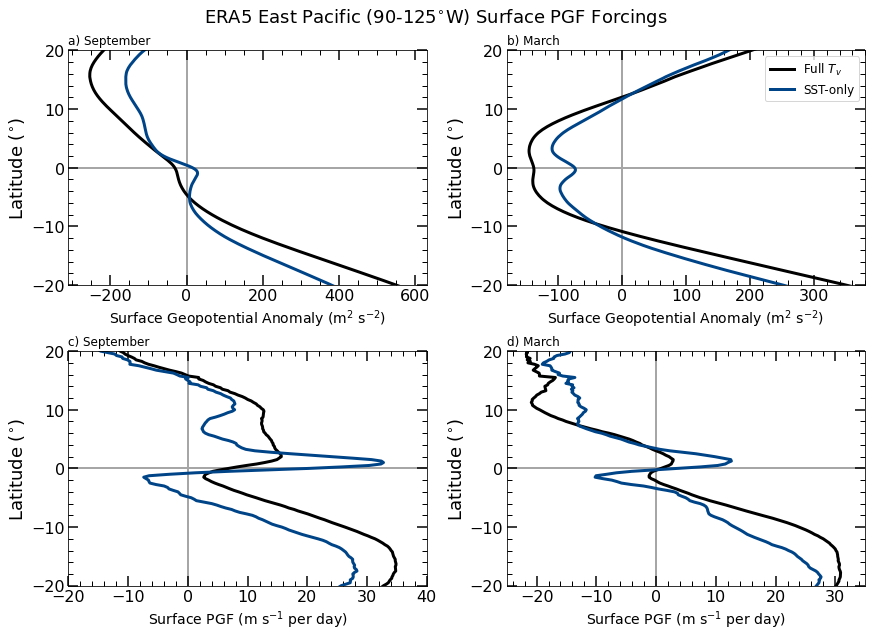

In [20]:
npan = 4
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(12,12), constrained_layout=True)
fig.suptitle(dataset+r' East Pacific (90-125$^{\circ}$W) Surface PGF Forcings', fontsize=18)#, y=0.78)
for jj in range(0,npan,1):
   ax1 = fig.add_subplot(3,2,jj+1)
   plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', top='True')
  
   ax1.tick_params(axis='x', labelsize=16)
   ax1.tick_params(axis='y', labelsize=16)
   plt.ylim(-20,20)
   ax1.set_ylabel(r'Latitude ($^{\circ}$)', fontsize=18)

   if jj == 0: 
      month = 8
      plt.title('a) September', loc='left')
      color = 'k'
      lns1 = ax1.plot(Tv_anom_plt[month,:], lat, color=color, linewidth='3')
      color = '#004488'
      lns2 = ax1.plot(sst_anom_plt[month,:], lat, color=color, linewidth='3')
      color = '#BB5566'
      #lns3 = ax1.plot(Tv_FT_anom_plt.sel(month=month), lat, color=color, linewidth='3')
      #color = '#DDAA33'
      #lns4 = ax1.plot(PGF_anom_plt.sel(month=month), lat, color=color, linewidth='3')
      #plt.legend([r'Full $T_{v}$','SST-only',r'PGF$_{850}$'],loc=1,fontsize=12) #title='',
      plt.xlim(-310,630)
      plt.xlabel(r'Surface Geopotential Anomaly (m$^2$ s$^{-2}$)', fontsize=14)
   if jj == 1:     
      month = 2
      plt.title('b) March', loc='left')
      color = 'k'
      lns1 = ax1.plot(Tv_anom_plt[month,:], lat, color=color, linewidth='3')
      color = '#004488'
      lns2 = ax1.plot(sst_anom_plt[month,:], lat, color=color, linewidth='3')
      color = '#BB5566'
      #lns3 = ax1.plot(Tv_FT_anom_plt.sel(month=month), lat, color=color, linewidth='3')
      #color = '#DDAA33'
      #lns4 = ax1.plot(PGF_anom_plt.sel(month=month), lat, color=color, linewidth='3')
      plt.legend([r'Full $T_{v}$','SST-only',r'PGF$_{850}$'],loc=1,fontsize=12) #title='',
      plt.xlim(-180,380)
      plt.xlabel(r'Surface Geopotential Anomaly (m$^2$ s$^{-2}$)', fontsize=14)
   if jj == 2: 
      month = 8
      plt.title('c) September', loc='left')
      color = 'k'
      lns1 = ax1.plot(-data_Tv['pgf'][month,:]*86400, lat, color=color, linewidth='3')
      color = '#004488'
      lns2 = ax1.plot(-data_SST['pgf'][month,:]*86400, lat, color=color, linewidth='3')
      color = '#BB5566'
      #lns3 = ax1.plot(-pgf_upper_full.sel(month=month)*86400, lat, color=color, linewidth='3')
      #color = '#DDAA33'
      #lns4 = ax1.plot(- data_FT['pgf'].sel(month=month)*86400, lat, color=color, linewidth='3')
      plt.xlim(-20,40)
      plt.xlabel(r'Surface PGF (m s$^{-1}$ per day)', fontsize=14)
   if jj == 3:     
      month = 2
      plt.title('d) March', loc='left')
      color = 'k'
      lns1 = ax1.plot(-data_Tv['pgf'][month,:]*86400, lat, color=color, linewidth='3')
      color = '#004488'
      lns2 = ax1.plot(-data_SST['pgf'][month,:]*86400, lat, color=color, linewidth='3')
      color = '#BB5566'
      #lns3 = ax1.plot(-pgf_upper_full.sel(month=month)*86400, lat, color=color, linewidth='3')
      #color = '#DDAA33'
      #lns4 = ax1.plot(- data_FT['pgf'].sel(month=month)*86400, lat, color=color, linewidth='3')
      #plt.legend([r'Full T$_{v}$','SST',r'PGF$_{850}$'],loc=1,fontsize=12) #title='',
      plt.xlim(-25,35)
      plt.xlabel(r'Surface PGF (m s$^{-1}$ per day)', fontsize=14)
        
   plt.axvline(0, color='0.65', linewidth = 2.0, zorder=-1)
   plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)

#plt.savefig(figfolder+'Surface_PGF_Geop_forcings_final.pdf', dpi=150)

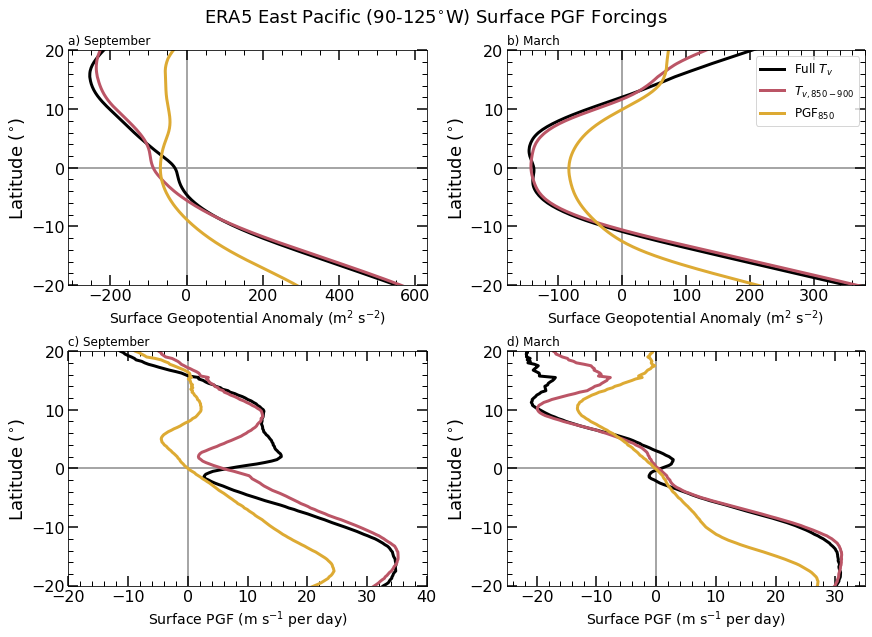

In [22]:
# FT tv and PGF 850
npan = 4
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(12,12), constrained_layout=True)
fig.suptitle(dataset+r' East Pacific (90-125$^{\circ}$W) Surface PGF Forcings', fontsize=18)#, y=0.78)
for jj in range(0,npan,1):
   ax1 = fig.add_subplot(3,2,jj+1)
   plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', top='True')
  
   ax1.tick_params(axis='x', labelsize=16)
   ax1.tick_params(axis='y', labelsize=16)
   plt.ylim(-20,20)
   ax1.set_ylabel(r'Latitude ($^{\circ}$)', fontsize=18)

   if jj == 0: 
      month = 8
      plt.title('a) September', loc='left')
      color = 'k'
      lns1 = ax1.plot(Tv_anom_plt[month,:], lat, color=color, linewidth='3')
      color = '#BB5566'
      lns2 = ax1.plot(Tv_FT_anom_plt[month,:], lat, color=color, linewidth='3')
      color = '#DDAA33'
      #lns3 = ax1.plot(Tv_FT_anom_plt.sel(month=month), lat, color=color, linewidth='3')
      #color = '#DDAA33'
      lns4 = ax1.plot(PGF_anom_plt[month,:], lat, color=color, linewidth='3')
      #plt.legend([r'Full $T_{v}$','SST-only',r'PGF$_{850}$'],loc=1,fontsize=12) #title='',
      plt.xlim(-310,630)
      plt.xlabel(r'Surface Geopotential Anomaly (m$^2$ s$^{-2}$)', fontsize=14)
   if jj == 1:     
      month = 2
      plt.title('b) March', loc='left')
      color = 'k'
      lns1 = ax1.plot(Tv_anom_plt[month,:], lat, color=color, linewidth='3')
      color = '#BB5566'
      lns2 = ax1.plot(Tv_FT_anom_plt[month,:], lat, color=color, linewidth='3')
      color = '#DDAA33'
      #lns3 = ax1.plot(Tv_FT_anom_plt.sel(month=month), lat, color=color, linewidth='3')
      #color = '#DDAA33'
      lns4 = ax1.plot(PGF_anom_plt[month,:], lat, color=color, linewidth='3')
      plt.legend([r'Full $T_{v}$',r'$T_{v,850-900}$',r'PGF$_{850}$'],loc=1,fontsize=12) #title='',
      plt.xlim(-180,380)
      plt.xlabel(r'Surface Geopotential Anomaly (m$^2$ s$^{-2}$)', fontsize=14)
   if jj == 2: 
      month = 8
      plt.title('c) September', loc='left')
      color = 'k'
      lns1 = ax1.plot(-data_Tv['pgf'][month,:]*86400, lat, color=color, linewidth='3')
      color = '#BB5566'
      lns2 = ax1.plot(-data_tv_FT['pgf'][month,:]*86400, lat, color=color, linewidth='3')
      color = '#DDAA33'
      #lns3 = ax1.plot(-pgf_upper_full.sel(month=month)*86400, lat, color=color, linewidth='3')
      #color = '#DDAA33'
      lns4 = ax1.plot(-data_FT['pgf'][month,:]*86400, lat, color=color, linewidth='3')
      plt.xlim(-20,40)
      plt.xlabel(r'Surface PGF (m s$^{-1}$ per day)', fontsize=14)
   if jj == 3:     
      month = 2
      plt.title('d) March', loc='left')
      color = 'k'
      lns1 = ax1.plot(-data_Tv['pgf'][month,:]*86400, lat, color=color, linewidth='3')
      color = '#BB5566'
      lns2 = ax1.plot(-data_tv_FT['pgf'][month,:]*86400, lat, color=color, linewidth='3')
      color = '#DDAA33'
      #lns3 = ax1.plot(-pgf_upper_full.sel(month=month)*86400, lat, color=color, linewidth='3')
      #color = '#DDAA33'
      lns4 = ax1.plot(-data_FT['pgf'][month,:]*86400, lat, color=color, linewidth='3')
      #plt.legend([r'Full T$_{v}$','SST',r'PGF$_{850}$'],loc=1,fontsize=12) #title='',
      plt.xlim(-25,35)
      plt.xlabel(r'Surface PGF (m s$^{-1}$ per day)', fontsize=14)
        
   plt.axvline(0, color='0.65', linewidth = 2.0, zorder=-1)
   plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)

#plt.savefig(figfolder+'Surface_PGF_Geop_forcings_suppl.pdf', dpi=150)